In [1]:
# Import the important libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importFashion MNIST dataset
fashionMNIST = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashionMNIST.load_data()

# Create class's names
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
model = tf.keras.models.load_model('fashionReader.model')
# Attach a softmax layer to convert the logits to probabilities
probabilityModel = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probabilityModel.predict(testImages)

In [4]:
# Create helper functions that can help plot our images
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

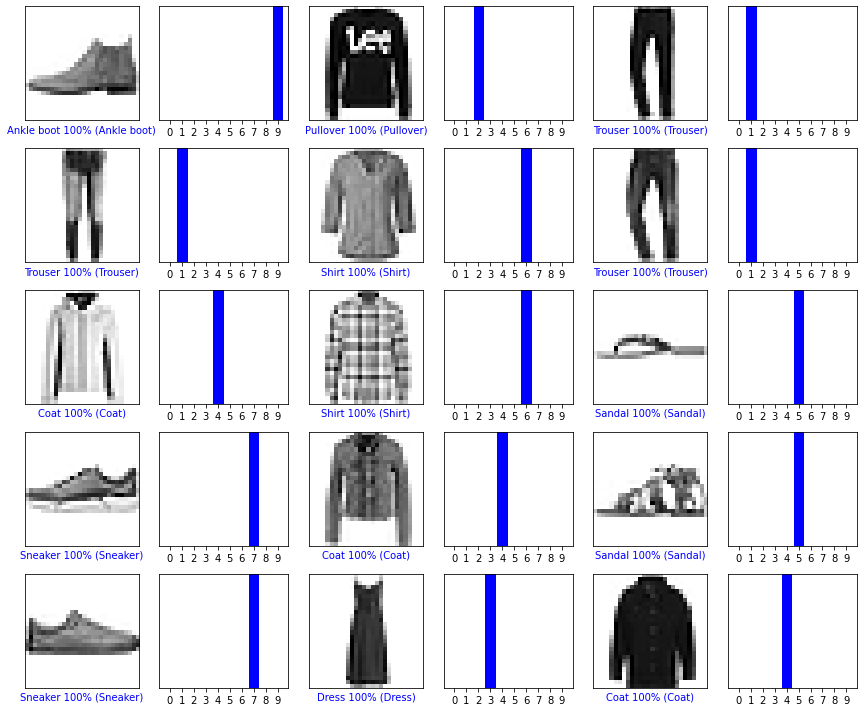

In [5]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testLabels, testImages)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()

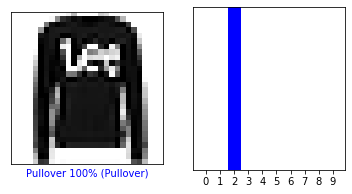

In [6]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

In [7]:
# Grab an image from the test dataset
img = testImages[1]
print(img.shape)

(28, 28)


In [8]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [9]:
predictionsSingle = probabilityModel.predict(img)
print(predictionsSingle)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


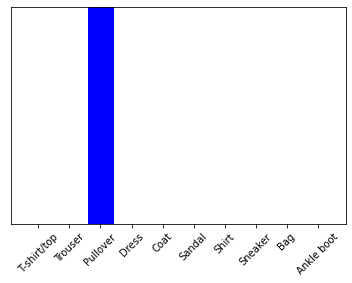

In [10]:
plot_value_array(1, predictionsSingle[0], testLabels)
_ = plt.xticks(range(10), classNames, rotation=45)
plt.show()